In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [36]:
# Now to read in the data via read.csv 

df = pd.read_csv(r"C:\Users\Arron\Documents\movies.csv")

In [42]:
df
#taking a look at the data 

budget                                 company country  \
0      8000000           Columbia Pictures Corporation     USA   
1      6000000                      Paramount Pictures     USA   
2     15000000                      Paramount Pictures     USA   
3     18500000  Twentieth Century Fox Film Corporation     USA   
4      9000000                    Walt Disney Pictures     USA   
...        ...                                     ...     ...   
6815         0                Fox Searchlight Pictures      UK   
6816         0                Siempre Viva Productions     USA   
6817   3500000                  Warner Bros. Animation     USA   
6818         0                     Borderline Presents     USA   
6819         0               Les Productions du Tr�sor  France   

             director      genre      gross                            name  \
0          Rob Reiner  Adventure   52287414                     Stand by Me   
1         John Hughes     Comedy   70136369        Ferris Bueller's Day Off   
2          Tony Scott     Action  179800601                         Top Gun   
3       James Cameron     Action   85160248                          Aliens   
4      Randal Kleiser  Adventure   18564613         Flight of the Navigator   
...               ...        ...        ...                             ...   
6815  Mandie Fletcher     Comedy    4750497  Absolutely Fabulous: The Movie   
6816   Paul Duddridge      Drama      28368           Mothers and Daughters   
6817          Sam Liu  Animation    3775000        Batman: The Killing Joke   
6818    Nicolas Pesce      Drama      25981           The Eyes of My Mother   
6819    Nicole Garcia      Drama      37757       From the Land of the Moon   

     rating    released  runtime  score               star   votes  \
0         R  22/08/1986       89    8.1        Wil Wheaton  299174   
1     PG-13  11/06/1986      103    7.8  Matthew Broderick  264740   
2        PG  16/05/1986      110    6.9         Tom Cruise  236909   
3         R  18/07/1986      137    8.4   Sigourney Weaver  540152   
4        PG  01/08/1986       90    6.9        Joey Cramer   36636   
...     ...         ...      ...    ...                ...     ...   
6815      R  22/07/2016       91    5.4  Jennifer Saunders    9161   
6816  PG-13  06/05/2016       90    4.9        Selma Blair    1959   
6817      R  25/07/2016       76    6.5       Kevin Conroy   36333   
6818      R  02/12/2016       76    6.2     Kika Magalh�es    6947   
6819      R  28/07/2017      120    6.7   Marion Cotillard    2411   

                 writer  year  
0          Stephen King  1986  
1           John Hughes  1986  
2              Jim Cash  1986  
3         James Cameron  1986  
4         Mark H. Baker  1986  
...                 ...   ...  
6815  Jennifer Saunders  2016  
6816      Paige Cameron  2016  
6817    Brian Azzarello  2016  
6818      Nicolas Pesce  2016  
6819        Milena Agus  2016  

[6820 rows x 15 columns]

In [43]:
# I need to see if I have any missing data
#  looping through the data and see if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
    #there isn't. 

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [44]:
df.dtypes
#checking the data types. 

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [46]:
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

df
 
#cleaned data, changed interger type.

budget                                 company country  \
0      8000000           Columbia Pictures Corporation     USA   
1      6000000                      Paramount Pictures     USA   
2     15000000                      Paramount Pictures     USA   
3     18500000  Twentieth Century Fox Film Corporation     USA   
4      9000000                    Walt Disney Pictures     USA   
...        ...                                     ...     ...   
6815         0                Fox Searchlight Pictures      UK   
6816         0                Siempre Viva Productions     USA   
6817   3500000                  Warner Bros. Animation     USA   
6818         0                     Borderline Presents     USA   
6819         0               Les Productions du Tr�sor  France   

             director      genre      gross                            name  \
0          Rob Reiner  Adventure   52287414                     Stand by Me   
1         John Hughes     Comedy   70136369        Ferris Bueller's Day Off   
2          Tony Scott     Action  179800601                         Top Gun   
3       James Cameron     Action   85160248                          Aliens   
4      Randal Kleiser  Adventure   18564613         Flight of the Navigator   
...               ...        ...        ...                             ...   
6815  Mandie Fletcher     Comedy    4750497  Absolutely Fabulous: The Movie   
6816   Paul Duddridge      Drama      28368           Mothers and Daughters   
6817          Sam Liu  Animation    3775000        Batman: The Killing Joke   
6818    Nicolas Pesce      Drama      25981           The Eyes of My Mother   
6819    Nicole Garcia      Drama      37757       From the Land of the Moon   

     rating    released  runtime  score               star   votes  \
0         R  22/08/1986       89    8.1        Wil Wheaton  299174   
1     PG-13  11/06/1986      103    7.8  Matthew Broderick  264740   
2        PG  16/05/1986      110    6.9         Tom Cruise  236909   
3         R  18/07/1986      137    8.4   Sigourney Weaver  540152   
4        PG  01/08/1986       90    6.9        Joey Cramer   36636   
...     ...         ...      ...    ...                ...     ...   
6815      R  22/07/2016       91    5.4  Jennifer Saunders    9161   
6816  PG-13  06/05/2016       90    4.9        Selma Blair    1959   
6817      R  25/07/2016       76    6.5       Kevin Conroy   36333   
6818      R  02/12/2016       76    6.2     Kika Magalh�es    6947   
6819      R  28/07/2017      120    6.7   Marion Cotillard    2411   

                 writer  year  
0          Stephen King  1986  
1           John Hughes  1986  
2              Jim Cash  1986  
3         James Cameron  1986  
4         Mark H. Baker  1986  
...                 ...   ...  
6815  Jennifer Saunders  2016  
6816      Paige Cameron  2016  
6817    Brian Azzarello  2016  
6818      Nicolas Pesce  2016  
6819        Milena Agus  2016  

[6820 rows x 15 columns]

In [47]:
df.sort_values(by=["gross"],inplace=False, ascending=False)

#changed order of movies ascending by gross income. 

budget                                 company country  \
6380  245000000                               Lucasfilm     USA   
5061  237000000  Twentieth Century Fox Film Corporation      UK   
2420  200000000  Twentieth Century Fox Film Corporation     USA   
6391  150000000                      Universal Pictures     USA   
5723  220000000                          Marvel Studios     USA   
...         ...                                     ...     ...   
5917          0           Zentropa International Norway  Norway   
5699          0                        Isle of Man Film      UK   
6066          0                           Cinetel Films     USA   
2594   15000000                                Daybreak     USA   
6784          0                           Magic Lantern   Spain   

              director   genre      gross                          name  \
6380       J.J. Abrams  Action  936662225  Star Wars: The Force Awakens   
5061     James Cameron  Action  760507625                        Avatar   
2420     James Cameron   Drama  658672302                       Titanic   
6391   Colin Trevorrow  Action  652270625                Jurassic World   
5723       Joss Whedon  Action  623357910                  The Avengers   
...                ...     ...        ...                           ...   
5917       Petter N�ss  Action        547                Into the White   
5699    Sheree Folkson  Comedy        542               The Decoy Bride   
6066  Steven R. Monroe   Crime        441        I Spit on Your Grave 2   
2594      George Huang  Comedy        309                    Trojan War   
6784    Carles Torrens  Horror         70                           Pet   

     rating    released  runtime  score               star    votes  \
6380  PG-13  18/12/2015      136    8.1       Daisy Ridley   687192   
5061  PG-13  18/12/2009      162    7.8    Sam Worthington   954412   
2420  PG-13  19/12/1997      194    7.8  Leonardo DiCaprio   862554   
6391  PG-13  12/06/2015      124    7.0        Chris Pratt   469200   
5723  PG-13  04/05/2012      143    8.1  Robert Downey Jr.  1064633   
...     ...         ...      ...    ...                ...      ...   
5917      R  12/04/2013      104    7.2      Florian Lukas    16609   
5699     PG  09/03/2012       89    6.2    Kelly Macdonald     9018   
6066      R  19/01/2014      106    5.7    Jemma Dallender    21070   
2594  PG-13  01/10/1997       84    5.7       Will Friedle     5034   
6784      R  02/12/2016       94    5.7   Dominic Monaghan    10504   

               writer  year  
6380  Lawrence Kasdan  2015  
5061    James Cameron  2009  
2420    James Cameron  1997  
6391       Rick Jaffa  2015  
5723      Joss Whedon  2012  
...               ...   ...  
5917    Ole Meldgaard  2012  
5699    Neil Jaworski  2011  
6066       Neil Elman  2013  
2594        Andy Burg  1997  
6784    Jeremy Slater  2016  

[6820 rows x 15 columns]

In [48]:
pd.set_option("display.max_rows",None)

#Dropping any duplicates 

df["company"].drop_duplicates().sort_values


<bound method Series.sort_values of 0                           Columbia Pictures Corporation
1                                      Paramount Pictures
3                  Twentieth Century Fox Film Corporation
4                                    Walt Disney Pictures
5                                                 Hemdale
6                                  Henson Associates (HA)
7                 De Laurentiis Entertainment Group (DEG)
9                                    SLM Production Group
10                                          Rimfire Films
11                         Thorn EMI Screen Entertainment
15                     Producers Sales Organization (PSO)
17                                    Geffen Company, The
18                  New Century Entertainment Corporation
19                                     Universal Pictures
20                                        New Line Cinema
21                                         Orion Pictures
22                                  

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

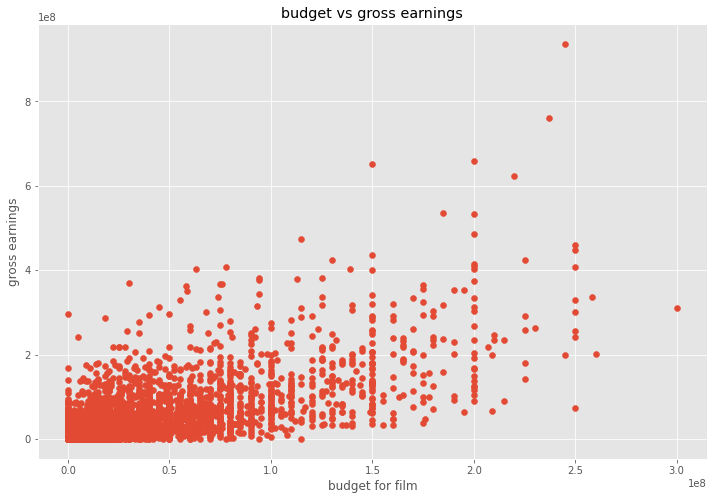

In [9]:
plt.scatter(x=df["budget"], y=df["gross"])

plt.title("budget vs gross earnings")

plt.xlabel("budget for film")

plt.ylabel("gross earnings")

plt.title 



<AxesSubplot:xlabel='budget', ylabel='gross'>

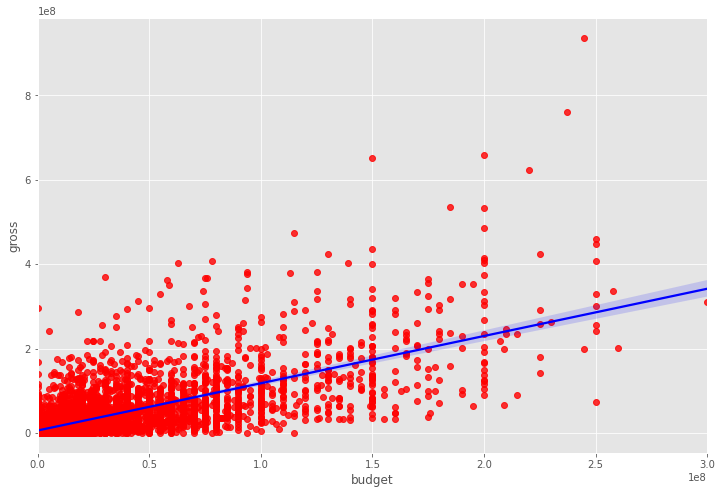

In [17]:
sns.regplot(x="budget", y="gross", data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

#plot using seaborn to see correlation  between gross profit and high budget. 

In [21]:
#To check cororlation between budget and gross. 
#pearson 

df.corr(method="pearson") 


budget     gross   runtime     score     votes      year
budget   1.000000  0.712196  0.268226  0.042145  0.503924  0.291009
gross    0.712196  1.000000  0.224579  0.165693  0.662457  0.191548
runtime  0.268226  0.224579  1.000000  0.395343  0.317399  0.087639
score    0.042145  0.165693  0.395343  1.000000  0.393607  0.105276
votes    0.503924  0.662457  0.317399  0.393607  1.000000  0.229304
year     0.291009  0.191548  0.087639  0.105276  0.229304  1.000000

In [32]:
# ^^^ As you can see, there is a high corolation between gross revenue and magnitude of the budget at 0.712





Text(87.0, 0.5, 'movie features')

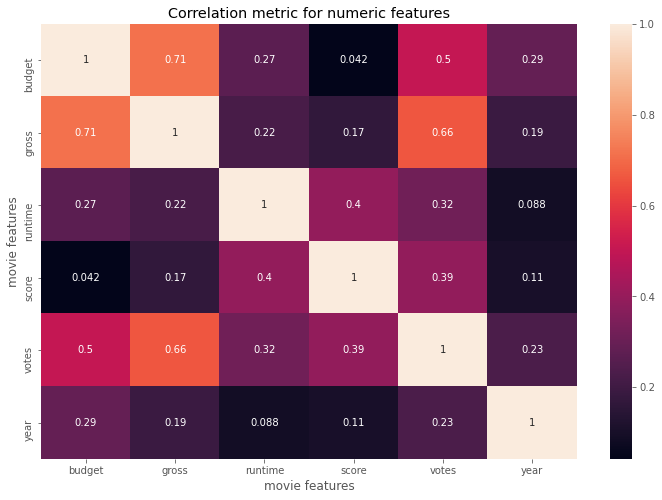

In [34]:
correlation_matrix= df.corr(method="pearson") 

sns.heatmap(correlation_matrix, annot =True )

plt.title("Correlation metric for numeric features")

plt.xlabel("movie features")

plt.ylabel("movie features")


#visualisation of the pearson correlaiton data. 

In [49]:
df.head()

# when dealing with the company for example, you can't covert the name of company into the graph because this feature 
#only deals with numbers. 

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  22/08/1986       89   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  11/06/1986      103   
2     Action  179800601                   Top Gun     PG  16/05/1986      110   
3     Action   85160248                    Aliens      R  18/07/1986      137   
4  Adventure   18564613   Flight of the Navigator     PG  01/08/1986       90   

   score               star   votes         writer  year  
0    8.1        Wil Wheaton  299174   Stephen King  1986  
1    7.8  Matthew Broderick  264740    John Hughes  1986  
2    6.9         Tom Cruise  236909       Jim Cash  1986  
3    8.4   Sigourney Weaver  540152  James Cameron  1986  
4    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [50]:

    
df_numerized=df
    
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        

df_numerized
    

#every category has now been nurmerized.
        
        


    

    
        
        

budget  company  country  director  genre      gross  name  rating  \
0       8000000      665       54      2192      1   52287414  4661       8   
1       6000000     1680       54      1296      4   70136369  1821       7   
2      15000000     1680       54      2645      0  179800601  6203       6   
3      18500000     2062       54      1066      0   85160248   295       8   
4       9000000     2122       54      2123      1   18564613  1872       6   
5       6000000     1158       53      1948      6  138530565  3903       8   
6      25000000     1160       53      1207      1   12729917  2883       6   
7       6000000      768       54       588      6    8551228   771       8   
8       9000000     1680       54      1004      4   40471663  3964       7   
9      15000000     1854       54       557      6   40456565  5306       8   
10      8800000     1827        2      2033      1  174635000  1238       7   
11     16000000     2024       53      2292      0    5900000  2306       8   
12      6000000     2062       54       612      4    8200000  3110       7   
13     25000000     2062       54      1267      0   11100000   686       7   
14     15000000      768       54      1792      5    8620929  3196       8   
15     17000000     1752       54        28      6    6734844    93       8   
16     10000000      768       54      2447      0    7433663  3248       8   
17     25000000     1052       54       811      4   38747385  3022       7   
18      2700000     1579       54      1845      0    3500000  6093       7   
19     35000000     2085       54      2699      0   16295774  2413       6   
20      2000000     1582       54      2441      0   13167232  1236       7   
21     11000000     1646       54        50      4   91258000   523       7   
22      4700000      508       54      2582      4    8025872  5978      12   
23     15000000     1280       54       459      0   42724017  2242       8   
24     25000000     1680       54      1562      1  109713132  4668       6   
25            0     2050       54      1258      4   40697761  4451       6   
26            0     1575       27      1138      5    7153487  5696       8   
27            0     2050       54      2391      0   24159872  2590       7   
28     25000000     1680       54      1805      0   79817937  5350       7   
29      1900000     1158       54      2570      5    4600000  4177       8   
30     25000000     1343       54      1303      4   39246734  6729       6   
31     25000000     2123       54       889      0   49042224  1122       8   
32            0     1049       16      1139      6    2003822   654       5   
33     24500000     2123       53      2264      1   17218023  5672       6   
34     13800000     2041       54      1702      6   52293982  5137       8   
35            0      665       54      1283      0  115103979  5511       6   
36            0     1424       54      1906      6    7177431  5078       6   
37      6000000     1124       54      2214     14    5844868  5416       8   
38     10000000      142       54      2145      4   37499651  5676       6   
39      3000000     1680       54      2612      9   19472057  2640       8   
40     25000000     2016       54      2068      1   14302779  5683       6   
41            0     2085       54       671      2   47483002   371       2   
42      4000000     1244       53        71      3    2826523  4473       8   
43     10000000      768       54      1287      0    4711220  2790       7   
44      4500000      866       54      2498      9    1261000  1964       8   
45     18000000     2050       54       794      4   41382841  3844       7   
46     19000000     1018       54       297      9   40996665  3929       7   
47      1100000      866       54      1265      4    5450815  6258       7   
48            0     1515       54      2043      0   38500726  4252       8   
49            0     1151       54      1805      4   262855

Text(87.0, 0.5, 'movie features')

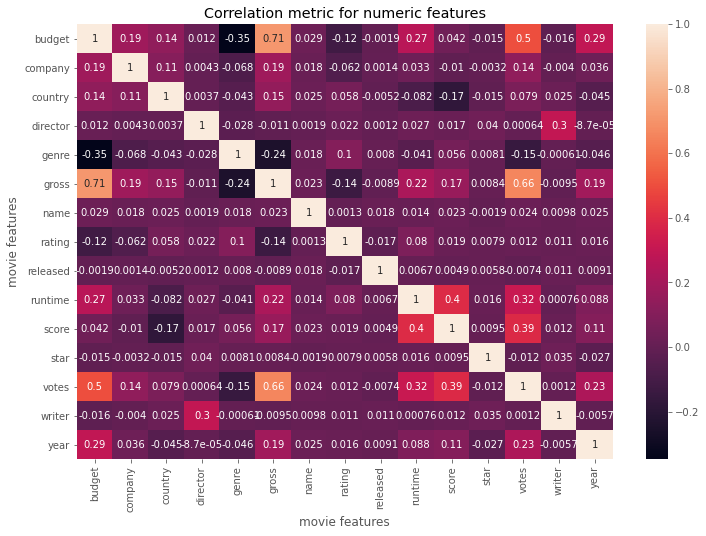

In [51]:
correlation_matrix= df_numerized.corr(method="pearson") 

sns.heatmap(correlation_matrix, annot =True )

plt.title("Correlation metric for numeric features")

plt.xlabel("movie features")

plt.ylabel("movie features")

In [64]:
#alot going on in this graph, need to make it even more clear 

Correlation_mat= df_numerized.corr()
corr_pairs=Correlation_mat.unstack()

corr_pairs
      
                

budget    budget      1.000000
          company     0.187205
          country     0.137635
          director    0.011602
          genre      -0.346794
          gross       0.712196
          name        0.028712
          rating     -0.119660
          released   -0.001867
          runtime     0.268226
          score       0.042145
          star       -0.015062
          votes       0.503924
          writer     -0.015611
          year        0.291009
company   budget      0.187205
          company     1.000000
          country     0.107950
          director    0.004320
          genre      -0.068330
          gross       0.187220
          name        0.018098
          rating     -0.062250
          released    0.001410
          runtime     0.033058
          score      -0.010426
          star       -0.003160
          votes       0.138662
          writer     -0.004032
          year        0.036272
country   budget      0.137635
          company     0.107950
        

In [68]:
sorted_pairs=corr_pairs.sort_values()

sorted_pairs


budget    genre      -0.346794
genre     budget     -0.346794
          gross      -0.242676
gross     genre      -0.242676
score     country    -0.174414
country   score      -0.174414
votes     genre      -0.150519
genre     votes      -0.150519
gross     rating     -0.135538
rating    gross      -0.135538
          budget     -0.119660
budget    rating     -0.119660
runtime   country    -0.081796
country   runtime    -0.081796
company   genre      -0.068330
genre     company    -0.068330
company   rating     -0.062250
rating    company    -0.062250
year      genre      -0.046259
genre     year       -0.046259
country   year       -0.045204
year      country    -0.045204
genre     country    -0.042793
country   genre      -0.042793
genre     runtime    -0.041357
runtime   genre      -0.041357
genre     director   -0.027669
director  genre      -0.027669
star      year       -0.026682
year      star       -0.026682
rating    released   -0.016739
released  rating     -0.016739
writer  

In [ ]:
#votes and budget have the highest Correlation with gross proift. 